In [1]:
#Importing all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from PIL import Image
import os
!pip install gradio
import gradio as gr
# warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing the important libraries for Tranforming image labels
from sklearn.preprocessing import LabelBinarizer
import pickle

# Importing backend from keras
from keras import backend as K
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.convolutional import MaxPooling2D

In [2]:
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

In [3]:
# installing and importing the opendatasets so as to use it retrieve datasets from kaggle
# !pip install opendatasets --upgrade --quiet
# import opendatasets as od

In [4]:
# # Downloading the data from kaggle
# kaggle_link = 'https://www.kaggle.com/datasets/emmarex/plantdisease'
# od.download(kaggle_link, force=True)

In [5]:
# function used converting images to an array
def imgarray(img_dir):
    try:
        image = cv2.imread(img_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return imgarray(image)
        else :
            return np.array([])
    except Exception as e:
        print(e)
        return None

In [6]:
## In this cell I will be declaring the dataset directory path denoted by "data_dir"
data_dir = "./plantdisease"

In [7]:
image_list = []
label_list = []

try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(data_dir)

    for plant_folder in root_dir:
        if plant_folder == ".DS_Store":
            continue

        plant_disease_folder_list = os.listdir(os.path.join(data_dir, plant_folder))

        for disease_folder in plant_disease_folder_list:
            if disease_folder == ".DS_Store":
                continue

            print(f"[INFO] Processing {disease_folder} ...")
            plant_disease_image_list = os.listdir(os.path.join(data_dir, plant_folder, disease_folder))

            for image in plant_disease_image_list[:200]:
                if image == ".DS_Store":
                    continue

                image_directory = os.path.join(data_dir, plant_folder, disease_folder, image)
                if image_directory.endswith((".jpg", ".JPG")):
                    try:
                        img = Image.open(image_directory)
                        image_list.append(img)
                        label_list.append(disease_folder)
                        print(f"[INFO] Image loaded: {image_directory}")
                    except Exception as e:
                        print(f"Error loading image: {image_directory} - {e}")

    print("[INFO] Image loading completed")

except Exception as e:
    print(f"Error: {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\01940b6d-7dea-4889-

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\131dd897-98e3-45f0-9b4a-48471c4cbf4c___JR_B.Spot 8845.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\1360c0b1-4eb4-491b-8544-738d3c420828___NREC_B.Spot 1977.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\1385e1e7-c7a5-4edb-8273-2f6a54c583fa___NREC_B.Spot 9128.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\13955856-c347-4039-ba30-09ea39d66534___NREC_B.Spot 9114.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\139a5c07-332c-4a2d-8bf2-bf33ce9184c6___NREC_B.Spot 1892.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\141a46fa-9293-4810-9cf6-b329346f8fb2___JR_B.Spot 8995.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\144ae14f-dbf4-4dfa-9d47-98fb33009a48___JR_B.Spot 3364.JPG
[INFO] Image loaded: ./plantdisea

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c4a898a-9812-423b-bd8a-419a09699270___JR_B.Spot 8853.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c8e565d-14be-4cbe-8873-2aa25a86b98c___JR_B.Spot 8903.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2ca511f9-951d-4f34-89af-25fd1a609584___NREC_B.Spot 9138.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2cdea224-6f10-4a3d-a3f1-1debd1a42640___JR_B.Spot 8926.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2d553272-2101-4d56-9819-9f08de938418___NREC_B.Spot 9087.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2d5def2a-c79d-444e-88be-a5961c9107d0___JR_B.Spot 3249.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2d7488fa-f033-4c1c-bc1f-b70f86406127___NREC_B.Spot 1800.JPG
[INFO] Image loaded: ./plantdisease

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\147582b1-0d36-4409-8810-1fd5d4304388___JR_HL 5977.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\14765754-33b2-427b-8583-05d8604384e1___JR_HL 5891.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\14a817b1-7628-4bfd-99a5-495a0581cb6c___JR_HL 8729.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\14a8f40d-e1b2-4d17-8bf1-c16c56f48d4c___JR_HL 8239.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\14d0f6a3-c314-4faa-8d6f-1770b21f4f04___JR_HL 8551.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\14dd8166-d162-4f2a-9376-211814f7d277___JR_HL 8400.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1518ab95-b80e-422f-bf88-d3b3a9fb7095___JR_HL 8009.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\15357dc6-ebde-4ce0-a230-4a1e07b08ecd___JR_HL 8

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\028f9b73-142f-499a-

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1c4e0445-375a-4c5d-b6fd-6123d22f009f___RS_Early.B 7972.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1ca9e3ba-e029-48bf-b207-e8cb3546f953___RS_Early.B 7978.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1cb05d87-027d-4bf0-b5c4-4c1a57896ac6___RS_Early.B 7936.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1d038d64-7f3c-4b4d-9b3d-7736f97b59a0___RS_Early.B 7994.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1d18a770-8a16-4765-bae9-5d96f781db89___RS_Early.B 7803.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1d2ec63e-acfb-4a80-ba21-853a724fff4a___RS_Early.B 8083.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1d301622-e359-49d5-b4ca-6837f254fd1b___RS_Early.B 6719.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1d466431-007d-4b3b-

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\1106c3fc-92cb-41a6-a6c6-8f08b9b45108___RS_HL 1914.JPG
[INFO] Image loaded: ./plantdisease\Plan

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\b61b9d33-59ea-41b0-a554-c382eb6128c5___RS_HL 1919.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\b89db9d3-a413-4781-bc88-5f6c2085ab5f___RS_HL 1909.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\b8b7b98a-eb1a-4213-9b0b-aeef4df427e8___RS_HL 1858.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\b925ad3e-fc49-497d-a6eb-115f0de20800___RS_HL 4170.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\b9ea902d-e557-4fa5-893b-39a7a57c0121___RS_HL 1893.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\bb04f738-1848-4dda-8834-384a48b335cd___RS_HL 1765.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\bb328d40-e4e6-4b84-a92a-e7cb3922c19d___RS_HL 1829.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\bde33d08-678c-4f84-b80e-fcb986a9a446___RS_HL 5415.JPG
[INFO] Image loaded: ./plantdisease\Plan

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\20880dc9-069c-40e5-81be-6d6e33f9519c___RS_LB 4098.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\20e59080-5a86-4aa8-b5b1-d886a4b273b7___RS_LB 3165.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\2122118e-02ee-452b-864c-adf36ed5ce9c___RS_LB 2890.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\21d8b66f-1ea5-48ad-92e2-9f708a969b7f___RS_LB 4097.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\224d9d63-c097-4142-b1a6-56f88a7bae2e___RS_LB 2630.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\2269e6d9-bb15-49f1-8349-2f0126165960___RS_LB 3197.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\227f2f04-4d59-48d9-958d-5cccc70d3f2b___RS_LB 2772.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\22b19227-ae7e-495e-9fe0-d286fbcf9412___RS_LB 3996.JPG
[INFO] I

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacteria

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c5eb8e4-e0fb-424a-8873-e43f9a6121ef___GCREC_Bact.Sp 6281.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c883752-3334-4615-841d-287d58ecf60d___GCREC_Bact.Sp 6119.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0c9b7dd9-a0c7-4b6e-bb4d-b2e3cab833d0___GCREC_Bact.Sp 6081.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0cbaca0d-e422-438f-89df-344b493888b8___GCREC_Bact.Sp 5832.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0cc3364e-3f2a-42b2-aefe-5af03dad2966___GCREC_Bact.Sp 5580.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0ce4dee0-2d0c-4c25-a9b2-4abc5f9083db___GCREC_Bact.Sp 3708.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0d227915-443b-402c-8a25-cc43434c4bb0___GCREC_Bact.Sp 5913.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\011aa278-a39e-40b0-b6e4-2e2f835889f0___RS_Erly.B 8251.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\01861c93-ea8b-4820-aaa8-cc6003b3e75b___RS_Erly.B 7855.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\01f87f04-ff38-4aba-b7d1-587aa06e5282___RS_

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1941f5d9-f31f-453e-b07c-3f90da6aa381___RS_Erly.B 8238.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\19427ace-5a24-4e30-8a4d-228ab4a3b99b___RS_Erly.B 7403.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\197fa869-c124-436e-b3cd-bced95f52a8e___RS_Erly.B 7834.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1a8bd88f-309f-4392-b387-7cb423ef0ab6___RS_Erly.B 7366.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1b4a2ad5-057d-4fac-9188-648edbe49751___RS_Erly.B 7767.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1ba88993-c3f8-462d-bd1b-e10819b9c96f___RS_Erly.B 8396.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1ba9a636-a673-45bc-b515-4fe6848f271e___RS_Erly.B 9605.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\1bb0101c-d0a4-41a5-85b9-6e8634d01a36___RS_

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2ef629c7-3366-41b5-a1b7-0e3bcb3ac28c___RS_Erly.B 9395.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2efd143b-619d-455d-9b16-95536cad01e3___RS_Erly.B 7780.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2f3c483a-b18d-4571-8c00-fb24f166d328___RS_Erly.B 7667.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2f6115d3-4997-4174-aa6a-9025c654e81f___RS_Erly.B 9374.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2f823081-0654-47f1-bb1e-88d7e99a94ca___RS_Erly.B 9542.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2fa6cd46-eb76-481e-b15a-44c858f705b3___RS_Erly.B 9532.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2ffcdf9e-9cf5-492e-80f8-6f80cd0be7cb___RS_Erly.B 7421.JPG
[INFO] Processing Tomato_healthy ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\000146ff-9

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\15ba0299-5f38-47ed-ab19-fe6a72737705___RS_HL 9732.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\15cae3c8-6843-49d1-8da6-33bd014f05ce___GH_HL Leaf 169.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\15daad17-78e9-45d2-9054-5a76221f6c1e___GH_HL Leaf 246.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\162db449-3361-40fa-a9bf-42bb63d43781___RS_HL 9647.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\164d5472-31c5-4145-b30a-93198436539d___RS_HL 0103.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\166b90f5-3bba-4aea-9bc4-212efb57a504___RS_HL 0377.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\167247af-fd67-4b70-a72e-052dc5ea863b___GH_HL Leaf 388.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\16927ddc-fc87-4ff2-b450-1edc2b4c6191___RS_HL 0051.JPG
[INFO] Image loaded: ./plantdisease\PlantV

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0920260a-69be-47bb-bb71-8a2c2cab149b___GHLB2 Leaf 88.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0931f7e6-8481-4d03-8fe6-d4ae7637142d___RS_Late.B 4917.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\09590524-981f-4dc5-b6e3-5225a0c48019___GHLB2ES Leaf 140.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\098502fa-e07f-4d89-8279-adf307800887___GHLB2 Leaf 8980.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\098f19fb-1064-4c96-9498-70adcd29f5ae___GHLB2 Leaf 8973.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0990b491-dd31-4b62-aa5a-c7bce97d552c___RS_Late.B 5558.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\09cdb8a4-0c20-4acd-b4c8-709fad7010fd___GHLB_PS Leaf 37 Day 16.jpg
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\09d2deda-7403-489f-b723-5ae5e00e2311_

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\15313d25-7420-46aa-a28d-92e4b631233e___GHLB2 Leaf 8698.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\1546f916-115c-42dc-90c7-ff8d53c4273f___RS_Late.B 4836.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\15581dd8-f562-4301-856c-30be9302c470___GHLB2 Leaf 70.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\157250ce-f291-48ec-9d81-184af5400f90___RS_Late.B 6652.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\15dc06c9-506a-470b-a015-14dcb585389f___GHLB_PS Leaf 15 Day 8.jpg
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\15e1e8d7-e05a-4dc1-b872-364b15f004f0___RS_Late.B 4873.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\15f05055-2bb1-45f7-8a39-fce071823266___RS_Late.B 6082.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\16064333-c2da-40e0-9f24-c709191e66b1___RS

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0f1ce7cf-da72-4ddb-9bdb-a1af620537c6___Crnl_L.Mold 6840.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0f740b31-f63b-4193-ab1a-6795c11a7f00___Crnl_L.Mold 7033.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0fd01669-64ab-4042-9715-bf1bcb2ccfbf___Crnl_L.Mold 6996.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\10671d95-f882-4e19-994f-b35917d2c763___Crnl_L.Mold 9098.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\1071fb04-ba12-4c59-a6ef-b43cd16139e5___Crnl_L.Mold 7119.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\10e1a86f-0355-4534-aed8-08c6f01548d4___Crnl_L.Mold 7018.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\110d3ff1-96ea-43f2-96cb-ac57d0b7dd6b___Crnl_L.Mold 6738.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\113ae06c-f41b-47f3-a1a5-bffd33fcfac1___Crnl_L.Mold 8

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\2f195926-6d02-4c40-bf4a-ba3a123fe66e___Crnl_L.Mold 9130.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\2f3608fd-5632-47ae-9309-970728d4342e___Crnl_L.Mold 6778.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\2f49ea7d-edf2-48bd-9598-449d8c83d0a0___Crnl_L.Mold 9154.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\301d7712-9538-418b-a767-041aa830d1ad___Crnl_L.Mold 6711.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\30677953-f7e1-4f57-95f2-288425b6bc02___Crnl_L.Mold 6938.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\306d3e00-d180-4645-9858-b22e3a292554___Crnl_L.Mold 6627.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\30f6aead-5cd9-453d-85e6-56e93c1987d8___Crnl_L.Mold 6886.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\32245a13-92fe-48bf-85c8-938819a057ee___Crnl_L.Mold 8

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0ea612c0-8416-4771-a8bb-d5d255800f94___JR_Sept.L.S 8533.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0ea8a7c0-74f4-404b-81f4-233e501dab60___Matt.S_CG 6731.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0ebf0c98-aeb9-4630-afa0-0c9a2dc32995___Matt.S_CG 6233.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0edb366d-1253-4498-a05a-8f666405edc6___Matt.S_CG 7862.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0ef9804e-d695-40e4-8950-08551255fa05___JR_Sept.L.S 8540.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\102edb0a-780d-4b7e-b31e-c06e5e85211f___Matt.S_CG 2588.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\10361c83-4549-4865-b995-5f27c884e8e2___Matt.S_CG 6096.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1e427d73-cd81-4476-9427-4854a10ea894___JR_Sept.L.S 2689.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1e8f411c-7f6b-42c0-8c84-70486b6c91d1___Keller.St_CG 1824.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1ea484d8-6ebf-4d95-81b1-1c7f78e92015___JR_Sept.L.S 8425.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1eb51af9-a622-4f97-a47b-b7474771d414___JR_Sept.L.S 2455.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1ecc0c20-9ef3-40af-a8d8-9a43463a26b4___Matt.S_CG 7654.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1f01e6fc-e4a2-4f40-bd17-bb3852cef631___Keller.St_CG 1825.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1f11a23b-8dd3-4fc8-82cf-235cfcdaf5b2___Matt.S_CG 2783.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_S

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\116999e1-33f4-41bc-a3a3-fbb3332bf143___Com.G_SpM_FL 1603.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\11ba6d63-4c6e-4a3f-acd9-18567bab6ab9___Com.G_SpM_FL 1728.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\11c54a04-20e8-439c-b520-2d5a3c18d12b___Com.G_SpM_FL 8875.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\12019ba6-405d-45b7-b0e6-5a6a665de0e7___Com.G_SpM_FL 8624.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\12166ab1-12f0-4480-8734-87f8164aa178___Com.G_SpM_FL 8951.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\123223d5-ec90-4df4-8a65-e474c88fda19___Com.G_SpM_FL 1664.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\007ec913-8cfe-43ed-b458-f041a17266ae___Com.G_TgS_FL 9844.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0197df47-a9cb-4b6c-b7

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\124f6318-c33b-4344-babd-d8f16be507c1___Com.G_TgS_FL 0857.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12c492b4-fb79-47c4-9bdd-720c1361a355___Com.G_TgS_FL 8224.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12d24a09-d4e7-419c-8a19-b0efa059c3ec___Com.G_TgS_FL 1020.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\13171789-e847-42d1-ac9b-cfeecb94bf82___Com.G_TgS_FL 1038.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\1321a438-2e26-42d0-81f5-2c04df6d7392___Com.G_TgS_FL 8412.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\132459bb-916b-4bff-a176-a43a9585df7c___Com.G_TgS_FL 9904.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\13251526-fecf-42d9-9d4e-81a06c5475e5___Com.G_TgS_FL 8376.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\13358e3d-69ae-40e0-9b

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\25f5dde8-4c91-46d6-b2e9-b818a12e3618___Com.G_TgS_FL 0822.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\26150f8e-52df-4b1e-b37c-01f3cfc8d746___Com.G_TgS_FL 9958.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\2615bf45-0d9a-4b11-8eab-25bb5b86937d___Com.G_TgS_FL 1053.JPG
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\006e354b-c054-4b72-a83c-e3feb038942e___PSU_CG 2330.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\00c07a77-15e6-4815-92d4-8d1e1afb7f3c___PSU_CG 2052.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\01b32f27-2b9b-4961-805b-8066bf4d90f1___PSU_CG 2417.JPG
[INFO] Image loaded: ./plantdise

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2bd56a9c-3dec-41f7-ab7a-403670ea0462___PSU_CG 2346.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2d053972-2f30-414c-9de9-e37c98e44648___PSU_CG 2104.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2d981dde-7e7f-4486-ae83-cdb9b28c7904___PSU_CG 2258.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2df35be7-ba8c-4ff6-a608-f7c481c59ede___PSU_CG 2202.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2e03280e-123a-4231-a73a-652c57338137___PSU_CG 2053.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2f240e5e-cbb9-406a-98aa-12028411429c___PSU_CG 2123.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2f8c596f-15d8-4524-b527-8617329c1819___PSU_CG 2146.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\72124620-ccfa-40d7-a518-a0257def7afc___PSU_CG 2335.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\7395917b-a4d4-4156-9bd8-55b4a4dc5022___PSU_CG 2207.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\739ccd84-1026-4871-8f5c-2320c205fe2e___PSU_CG 2399.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\73be89b4-f57a-4230-a0e4-4a0f50230fc7___PSU_CG 2142.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\73c3945a-ec2b-4e6e-ad9d-0ad6193d7136___PSU_CG 2375.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\73d4d7e9-6565-468f-83f4-ce0652c23577___PSU_CG 2316.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\7569fab7-ac19-4ac4-a01b-b77a4abb0c29___PSU_CG 2350.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\050c429f-7779-4952-8911-d4d255e00295___YLCV_GCREC 2868.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0515eeb0-1bfb-4307-b09d-8fce88e23aac___UF.GRC_YLCV_Lab 02549.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\053d3504-ce55-4fa1-b0e4-742f3fb86973___UF.GRC_YLCV_Lab 01980.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\054013a2-1b8d-4ed8-82f1-1e90fae528ae___UF.GRC_YLCV_Lab 02676.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\055e33e8-dc46-4cf0-a5f9-ce404a5647fd___YLCV_NREC 0150.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0563dce6-95ce-4ce1-a2b7-95f923b09d26___UF.GRC_YLCV_Lab 01993.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\056ed8b8-6220-

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\09397385-9a50-4d0a-bc52-bccfd6aa7c59___UF.GRC_YLCV_Lab 01763.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\0943c5de-fb84-4206-8b36-c4cd6f8cae90___UF.GRC_YLCV_Lab 03374.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\09454f5d-73ed-4311-a8f5-6baebadb232f___UF.GRC_YLCV_Lab 09387.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\09519dd7-ab98-4e3c-91a7-438de3f73608___UF.GRC_YLCV_Lab 09530.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\095dc511-bc42-4abe-ab82-2e3aaa6507f8___YLCV_GCREC 5283.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\09621d88-f15b-444a-880d-7b6d7db788ab___UF.GRC_YLCV_Lab 02604.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\096d9df

In [8]:
len(image_list)

2952

In [9]:
len(label_list)

2952

In [10]:
## Transforming image Labels using scikit learn (labelBinarizer)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [11]:
# the code below is to show the number of classes of the labels binarized
print(n_classes)

15


In [12]:
# printing the labels binarized
print(label_binarizer.classes_)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [93]:
# labells = ['hell', 'hellos', 'ewrw', 'sdfgh']
# image_counts = [
#     len(y_test),
#     len(x_test),
#     len(y_train),
#     len(x_train),
    
# ]

# plt.figure(figsize=(10, 5))
# sns.barplot(x=labells, y=image_counts)
# plt.title('Image Distribution in Different Folders')
# plt.xlabel('Folders')
# plt.ylabel('Image Count')
# plt.xticks(rotation=45)
# plt.show()

In [57]:
## Making sure that the path I want to use is correct

pepper_dir = "plantdisease/PlantVillage/Pepper__bell___Bacterial_spot"
if os.path.exists(pepper_dir):
    DATA_PATH = os.listdir(pepper_dir)
    success = "The Path You Provided is Valid. \033[1m\033[92mSuccess Group 4\033[0m"
    print(success)

    # Rest of the code for plotting the images
else:
    error = "Directory not found. \033[1m\033[91mYou are bright but input the right path\033[0m"
    print(error)

The Path You Provided is Valid. Success Group 4


In [77]:
## Function to plot images

def plot_images_in_rows(image_dir, data_path, items_per_row):
    plt.figure(figsize=(15, 10))
    count = 0

    for i in range(3):
        plt.subplot(items_per_row, items_per_row, count + 1)
        plant_img = plt.imread(os.path.join(image_dir, data_path[i]))
        plt.imshow(plant_img, cmap='gray')
        plt.axis('off')
        plt.title(title)
        count += 1


        if count % items_per_row == 0:
            plt.tight_layout()
            plt.show()
            plt.figure(figsize=(15, 10))

    if count % items_per_row != 0:
        plt.tight_layout()
        plt.show()

Sample images of pepper bell Bacterial Spot 


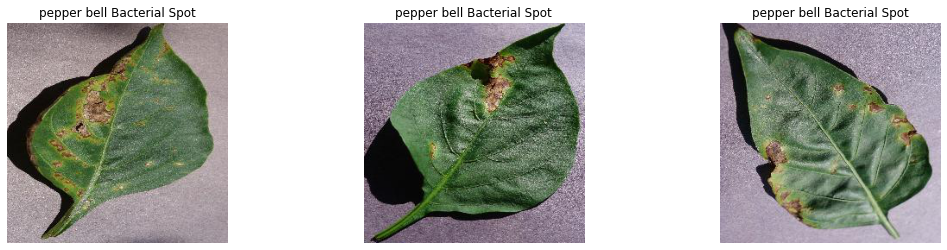

<Figure size 1080x720 with 0 Axes>

In [81]:
pepper_dir = "plantdisease/PlantVillage/Pepper__bell___Bacterial_spot"
pepper_path = os.listdir("plantdisease/PlantVillage/Pepper__bell___Bacterial_spot")
items_per_row = 3
title = "pepper bell Bacterial Spot"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(pepper_dir, pepper_path, items_per_row)


Sample images of Tomato Bacterial spot 


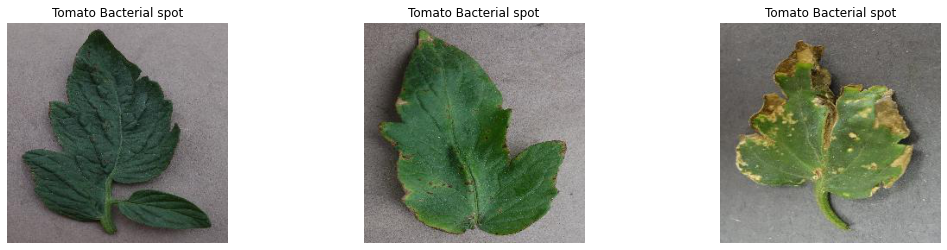

<Figure size 1080x720 with 0 Axes>

In [84]:
tomato_dir = "plantdisease/PlantVillage/Tomato_Bacterial_spot"
tomato_path = os.listdir("plantdisease/PlantVillage/Tomato_Bacterial_spot")
items_per_row = 3
title = "Tomato Bacterial spot"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(tomato_dir, tomato_path, items_per_row)

Sample images of Potato Late blight 


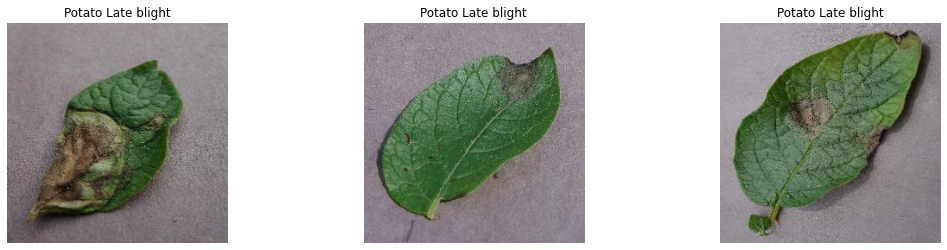

<Figure size 1080x720 with 0 Axes>

In [86]:
potato_dir = "plantdisease/PlantVillage/Potato___Late_blight"
potato_path = os.listdir("plantdisease/PlantVillage/Potato___Late_blight")
items_per_row = 3
title = "Potato Late blight"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(potato_dir, potato_path, items_per_row)

In [97]:
import random

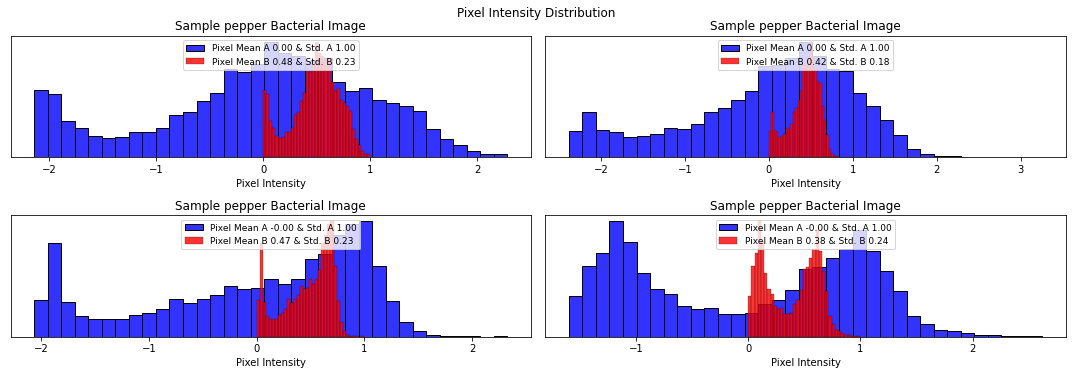

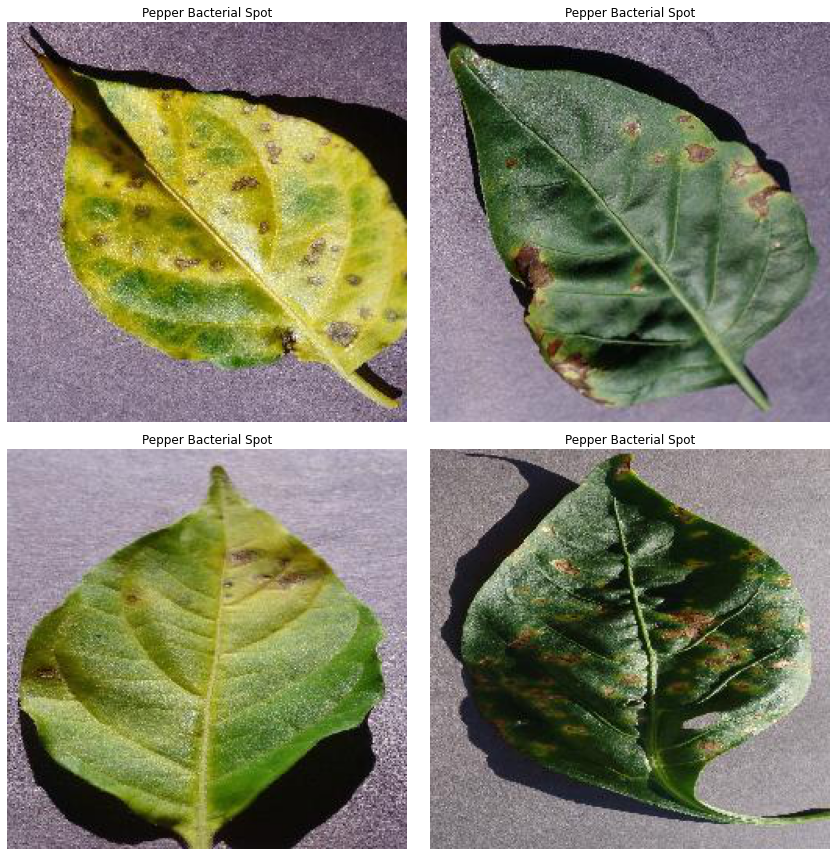

In [107]:
train_normal = os.listdir('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot')
labels = ['pepper']

train_im_n_selected = random.sample(train_normal, 4)


fig = plt.figure(figsize=(15, 15))
count = 1
valid_files = []

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot', img)
    if os.path.isfile(sample_path):
        valid_files.append(img)
        sample_img = Image.open(sample_path)
        sample_img = np.array(sample_img)
        sample_img = sample_img / 255.0
        sample_img_mean = np.mean(sample_img)
        sample_img_std = np.std(sample_img)
        new_sample_img = (sample_img - sample_img_mean) / sample_img_std
        ax = fig.add_subplot(6, 2, count, yticks=[])
        sns.histplot(new_sample_img.ravel(),
                     label=f'Pixel Mean A {np.mean(new_sample_img):.2f} & Std. A {np.std(new_sample_img):.2f}',
                     kde=False, color='blue', bins=35, alpha=0.8)
        sns.histplot(sample_img.ravel(),
                     label=f'Pixel Mean B {np.mean(sample_img):.2f} & Std. B {np.std(sample_img):.2f}',
                     kde=False, color='red', bins=35, alpha=0.8)
        plt.legend(loc='upper center', fontsize=9)
        plt.title("Sample pepper Bacterial Image")
        plt.xlabel('Pixel Intensity')
        plt.ylabel('# Pixels in Image')
        count += 1
    else:
        print(f"File not found: {sample_path}")

fig.suptitle('Pixel Intensity Distribution')
plt.tight_layout()
plt.show()

train_im_n_selected = valid_files

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot', img)
    sample_img = Image.open(sample_path)
    sample_img = np.array(sample_img)

    # Display the image in the corresponding subplot
    axes[i].imshow(sample_img, cmap='gray')
    axes[i].set_title('Pepper Bacterial Spot')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# converting the list of images to a numpy array
image_array = []

for img_file in image_list:
    # Extract the pixel data from the JpegImageFile object
    img_data = np.array(img_file, dtype=np.float16)
    # Normalize the pixel values
    img_data = img_data / 225.0
    # Append the image data to the image_array
    image_array.append(img_data)

# Convert the image_array to a NumPy array
img_np_array = np.array(image_array)

In [14]:
# confirming the datatype of our image array
type(img_np_array)

numpy.ndarray

In [15]:
# splitting our data into the test and training set
print("...Spliting data to train and test sets...")
x_train, x_test, y_train, y_test = train_test_split(img_np_array, image_labels, test_size=0.2, random_state = 42) 

...Spliting data to train and test sets...


In [16]:
# setting and declaring the data augmentation parameters
aug = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode="nearest")

In [17]:
inputShape = (height, width, depth)

In [18]:
# CNN
# Training the model
# Initialize model and proceed by adding layers (Convolution, Normalization, Max Pooling, Dense) with 'relu' as the preferred activation function
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=inputShape))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=n_classes, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [20]:
# importing Adam optimization algorithm
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
# train the network
print("[...training the network...")

[...training the network...


In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.000001)

In [23]:

#fitting the model
history = model.fit(aug.flow(x_train, y_train, batch_size = BS), 
                    epochs = EPOCHS,
                    validation_data = aug.flow(x_test, y_test),
                    callbacks = learning_rate_reduction)

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'])
plt.show()


In [ ]:
model.save_weights('PlantDiseasePredictor')


In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy graphical representation')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss graphical representation')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


In [ ]:
predictions = model.predict(x_test)
len(predictions)

In [ ]:
labels = label_binarizer.classes_
labels

In [ ]:
len(y_test)

In [ ]:
print(y_test.shape, predictions.shape)


In [ ]:
from sklearn.metrics import classification_report

aug.fit(x_train)

# Generate predictions on the augmented test set
augmented_x_test = aug.flow(x_test, batch_size=len(x_test), shuffle=False)
predictions = model.predict(augmented_x_test)

# Convert raw predictions to binary labels
predictions = (predictions > 0.5).astype(int)

# Evaluate the model's performance
report = classification_report(y_test, predictions)
print(report)

In [ ]:
# from sklearn.metrics import classification_report

# aug.fit(x_train, y_train)

# # Generate predictions on the test set
# predictions = clf.predict(x_test)

# # Convert predictions to a numpy array and flatten it
# predictions = np.array(predictions)
# predictions = predictions.flatten()

# # Evaluate the model's performance
# report = classification_report(y_test, predictions)
# print(report)

In [ ]:
import numpy as np

# sn = len(y_test)  # Get the length of y_test
# predictions = np.array(predictions)
# random_predictions = np.random.choice(predictions, size=sn)



In [ ]:

# # Generate random predictions
# sn = len(y_test)  # Get the length of y_test
# random_predictions = np.random.choice(predictions, size=len(y_test))

# target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
#                 'Potato___Early_blight', 'Potato___Late_blight',
#                 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
#                 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
#                 'Tomato_Septoria_leaf_spot',
#                 'Tomato_Spider_mites_Two_spotted_spider_mite',
#                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
#                 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# # Evaluate the model's performance
# report = classification_report(y_test, random_predictions, target_names=target_names)
# print(report)


In [ ]:

target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
                'Potato___Early_blight', 'Potato___Late_blight',
                'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
                'Tomato_Late_blight', 'Tomato_Leaf_Mold',
                'Tomato_Septoria_leaf_spot',
                'Tomato_Spider_mites_Two_spotted_spider_mite',
                'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# Evaluate the model's performance
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
cm
